# Машинное обучение, ФЭН ВШЭ

# Практическое задание 2
(Основано на материалах курса машинного обучения на фкн)

## Общая информация

Дата выдачи: 21.09.2017

Срок сдачи: 8.10.2017 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеку NumPy;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы.


Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на почту курса, указав соответствующую тему (см. вики-страничку курча).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

**1. (0.3 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [43]:
def max_element(arr):
    null_element = np.array(arr==0)
    if sum(null_element) == 0:
        print("None")
    else:
        aug = np.append(False,null_element[:-1])
        max_values = max(arr[aug])
        return max_values

**2. (0.3 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [63]:
def nearest_value(X, v):
    min_diff = (np.abs(X-v)).argmin()
    closest_value = X.flat[min_diff]
    return closest_value

**3. (0.3 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [97]:
def scale(X):
    mean = np.mean(X)
    std = np.std(X)
    if std == 0:
        print("Zero std")
    else:
        scaled = (X-mean)/std
        return scaled

**4. (0.3 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [155]:
from numpy import linalg
def get_stats(X):
    det = np.linalg.det(X)
    tr = np.matrix.trace(X)
    min = X.min()
    max = X.max()
    frob = np.linalg.norm(X,ord="fro")
    eigen = np.linalg.eigvals(X)
    inv = np.linalg.inv(X)
    print ("Определитель",det)
    print("След",tr)
    print("Минимум",min,"Максимум",max)
    print( "Норма Фробениуса",frob)
    print("Собственные числа",eigen)
    print("Обратная матрица",inv)
X = np.random.normal(10,1,9).reshape(3,3)
get_stats(X)

Определитель -18.5221953404
След 27.753253085
Минимум 7.43963002164 Максимум 11.2230883038
Норма Фробениуса 28.0123322646
Собственные числа [ 27.95520955  -0.92119982   0.71924336]
Обратная матрица [[-0.76453629  0.20250519  0.47468938]
 [ 0.38355005  0.690949   -0.86997937]
 [ 0.36686091 -0.79062705  0.41416798]]


**5. (0.3 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [157]:
max_list = []
for exp_num in range(100):
    m1 = np.random.randn(10,10)
    m2 = np.random.randn(10,10)
    mult = np.dot(m1,m2)
    max_mult = mult.max()
    max_list.append(max_mult)
quantile = np.percentile(max_list,95)
mean = np.mean(max_list)
print("Квантиль",quantile,"Среднее", mean)

Квантиль 12.0000903519 Среднее 8.36040272095


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать данные по авиарейсам в США за январь-апрель 2008 года для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.


[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

### Подготовка данных

**6. (0.75 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [12]:
import pandas as pd
data = pd.read_csv("C://Users/user/Desktop/Вышка/4 курс/Машинное обучение/HW-2/2008.csv",\
                sep=',')

In [13]:
# Имеются ли пропущенные значения
if data.isnull().values.any() == True:
    print('Имеются пропущенные значения')

print("Имеется",sum(data.isnull().sum()), "пропущенных значений")

count = 0
for i in data.columns:
    if data[i].isnull().values.any()==True:
        count+=1
print(count, "Признаков имеют хотя бы 1 пропуск")
count2=0
for i in range(len(data.index)):
    if data.iloc[i,:].isnull().values.any()==True:
        count2+=1
print(count2, "Объектов имеют хотя бы 1 пропуск")

Имеются пропущенные значения
Имеется 355215 пропущенных значений
16 Признаков имеют хотя бы 1 пропуск
70000 Объектов имеют хотя бы 1 пропуск


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [14]:
if data.DepDelay.isnull().values.any() == True:
    print("В DepDelay есть пропущенные значения")

В DepDelay есть пропущенные значения


In [15]:
# Мы видим, что все эти рейсы были отменены по различным причинам, следовательно, они не были "Diverted" (отложены) 
# и все остальные значения пропущены
dropped = data[data.DepDelay.isnull()]
dropped
# Можем отбросить код отмены("CancellationCode"), так как мы исключаем пропущенные значения 

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
194,2008,1,28,1,NaN,1640,NaN,1719,UA,753,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
204,2008,6,13,5,NaN,1229,NaN,1421,OH,5765,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
236,2008,7,19,6,NaN,544,NaN,917,OO,6151,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
257,2008,4,19,6,NaN,1345,NaN,1435,AA,1853,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
267,2008,9,23,2,NaN,1400,NaN,1515,WN,2049,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


In [16]:
# Уберем пропущенные и нулевые значения
miss = data.DepDelay.dropna()
not_null = miss[miss!=0]
data = data.loc[not_null.index]
# Выделим DepDelay в отдельную переменную
delay = data[["DepDelay"]]
# Уберем ненужные призанки
data = data.drop(["DepDelay","Cancelled","CancellationCode","Diverted"],axis=1)

**7. (1 балл)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [17]:
times = ["DepTime","CRSDepTime","ArrTime","CRSArrTime"]
for i in times:
    data[i+"_Hour"] = data[i] //100
    data[i+"_Minute"] = data[i] % 100
    data = data.drop(i,axis=1)

**8. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [18]:
data = data.drop(["TailNum","Year"],axis=1)

In [19]:
data.dtypes

Month                  int64
DayofMonth             int64
DayOfWeek              int64
UniqueCarrier         object
FlightNum              int64
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
DepTime_Hour         float64
DepTime_Minute       float64
CRSDepTime_Hour        int64
CRSDepTime_Minute      int64
ArrTime_Hour         float64
ArrTime_Minute       float64
CRSArrTime_Hour        int64
CRSArrTime_Minute      int64
dtype: object

In [20]:
for i in data.columns:
    if (data[i].dtype != "object"):
        print(i, delay.DepDelay.corr(data[i],method='pearson'))

Month -0.0295284355135
DayofMonth 0.00857381395908
DayOfWeek 0.0085300821683
FlightNum 0.0211664495964
ActualElapsedTime 0.0419460588407
CRSElapsedTime 0.0343018722712
AirTime 0.0252373033045
ArrDelay 0.933525938482
Distance 0.0242523920732
TaxiIn 0.020640432286
TaxiOut 0.101294189022
CarrierDelay 0.532696179045
WeatherDelay 0.238872240063
NASDelay 0.171590575897
SecurityDelay 0.0106679312951
LateAircraftDelay 0.553805903594
DepTime_Hour 0.203124568913
DepTime_Minute -0.0170548066739
CRSDepTime_Hour 0.140084486975
CRSDepTime_Minute 0.0224373274671
ArrTime_Hour 0.0701811108113
ArrTime_Minute 0.00617138358464
CRSArrTime_Hour 0.135560872548
CRSArrTime_Minute 0.00860927622987


In [21]:
# Удалим признак ArrDelay, так как он сильно скоррелирован с целевой переменной. Также удалим переменные, показывающие задержку,
# так как для новых наблюдений эти данные неизвестны
data=data.drop(['ArrDelay','DepTime_Minute','DepTime_Hour','ArrTime_Minute','ArrTime_Hour'],axis=1)

Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

**9*. (1 бонусный балл) ** В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

In [22]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

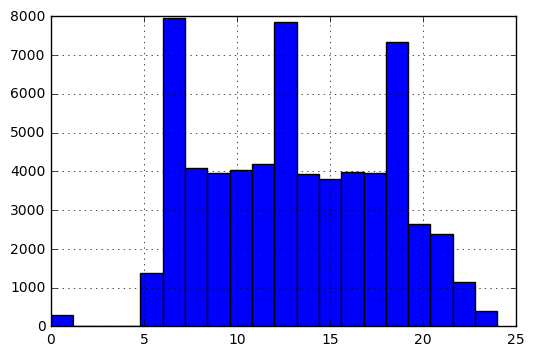

In [65]:
deptime_h = data['DepTime_Hour']
deptime_h.hist(bins=20)

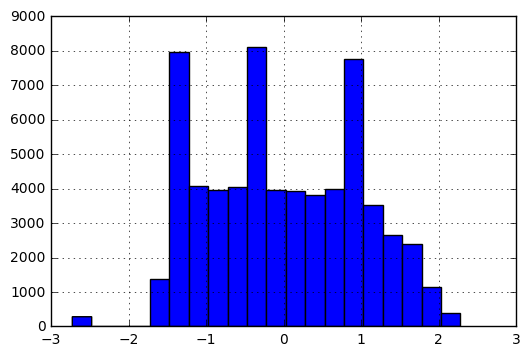

In [66]:
((deptime_h-deptime_h.mean())/deptime_h.std()).hist(bins=20)

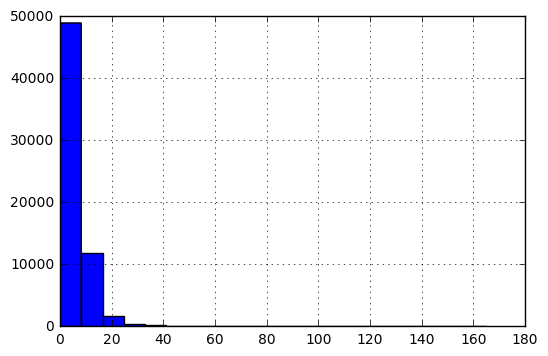

In [67]:
taxi_in = data['TaxiIn']
taxi_in.hist(bins=20)

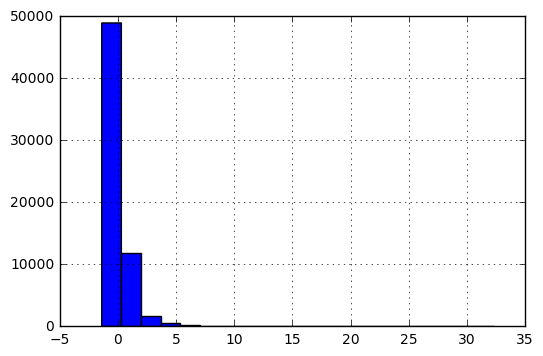

In [68]:
((taxi_in-taxi_in.mean())/taxi_in.std()).hist(bins=20)

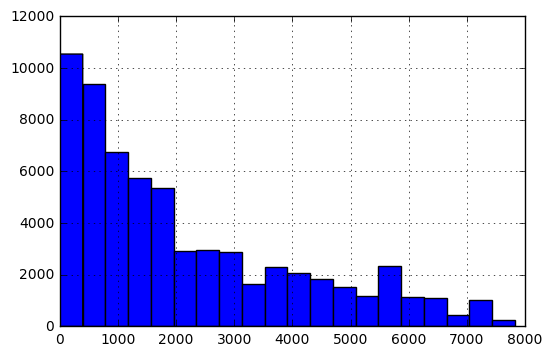

In [69]:
flight_num = data['FlightNum']
flight_num.hist(bins=20)

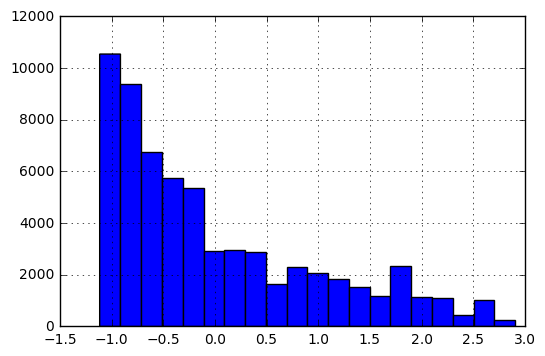

In [70]:
((flight_num-flight_num.mean())/flight_num.std()).hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

**10. (1 балл)** Вдобавок к масштабированию, некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).


Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [23]:
# Удалим из выборки значение Origin, так как при дальнейшей работе, когда мы будем выбирать 1000 наблюдений, оно будет мешать 
# линейной независимости наших столбцов 
data = data.drop("Origin",axis=1)

In [24]:
from sklearn.feature_extraction import DictVectorizer 
from sklearn.preprocessing import StandardScaler
def transform_data(data):
    boolean = []
    real = []
    for i in data.columns:
        if data[i].dtype == 'object':
            boolean.append(i)
        else:
            real.append(i)
    data[boolean]=data[boolean].fillna('nan')
    data[real]=data[real].fillna(0)
    data[real] = StandardScaler().fit_transform(data[real])
    dummy_var = pd.get_dummies(data[boolean])
    data=data[real].join(dummy_var)
    return data

In [25]:
data = transform_data(data)
data

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,-0.118281,0.256485,-0.462767,-0.991600,-0.988979,-0.916826,-0.849307,-0.744130,-0.786908,-0.741204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.118281,-1.332050,-0.462767,0.106546,-0.040552,0.127377,0.064301,0.183961,-0.582387,-0.389769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.467662,-1.445517,1.541454,-0.207284,0.157627,0.370547,0.314806,0.471018,-0.582387,-0.653345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.583137,0.823819,-0.462767,0.836931,-0.351976,-0.258835,-0.363032,-0.347886,-0.582387,0.225242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.411252,-1.332050,1.541454,-0.910960,0.299183,0.442068,0.476898,0.634799,-0.582387,-0.741204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-1.583137,-1.445517,0.038288,-0.687530,0.624762,0.499285,0.727403,0.525612,-0.377866,-0.301910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-0.997195,1.731554,-1.464878,-0.299738,-0.748333,-0.773785,-0.716686,-0.707147,-0.377866,-0.214051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-0.704223,0.710352,-0.963823,-0.798988,3.045375,3.460244,2.923008,2.674134,0.440219,1.279547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-0.997195,-1.332050,-0.963823,-0.882710,0.667229,0.728151,0.889495,0.603099,-0.582387,-0.916921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.053604,-1.105117,-1.464878,-0.977219,1.021120,1.157276,1.081058,1.457225,-0.173345,-0.038334,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [26]:
data.shape

(63404, 337)

**11. (0.75 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [27]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, delay, test_size=0.3, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [28]:
from sklearn.linear_model import LinearRegression as lm
import sklearn.metrics as metrics
lr = lm()
x_lr = X_train[:1000]
y_lr = y_train[:1000]
reg = lr.fit(x_lr,y_lr)
print('Обучающая подвыборка, MSE:',metrics.mean_squared_error(y_lr, reg.predict(x_lr)))
print('Обучающая подвыборка R^2: %f' %lr.score(x_lr,y_lr))
print('============================')
print("Тестовая подвыборка, MSE:",metrics.mean_squared_error(y_test, reg.predict(X_test)))
print("Тестовая подвыборка R^2 %f" %lr.score(X_test,y_test))

Обучающая подвыборка, MSE: 56.5093974244
Обучающая подвыборка R^2: 0.946680
Тестовая подвыборка, MSE: 8.13365857287e+20
Тестовая подвыборка R^2 -608047192173305984.000000


In [29]:
# Модель переобучилась, так как мы получаем очень высокое значение R^2 на обучающей выборке и очень низкое значение на тестовой

In [30]:
cols = pd.DataFrame(X_train.columns)
coefs = pd.DataFrame((lr.coef_).T)
coef = pd.concat([cols,coefs],axis=1)
coef.columns = ["Columns","Coefficients"]
coef

,Columns,Coefficients
0,Month,-4.636585e-01
1,DayofMonth,-4.517074e-01
2,DayOfWeek,3.630604e-01
3,FlightNum,-9.139413e-01
4,ActualElapsedTime,1.212283e+02
5,CRSElapsedTime,3.197890e+01
6,AirTime,-1.477751e+02
7,Distance,8.886490e-02
8,TaxiIn,-1.122847e+01
9,TaxiOut,-2.696850e+01


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**13. (1 балл)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.12. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [31]:
from sklearn.linear_model import LassoCV, RidgeCV
alpha_grid = np.arange(0.01, 6, 0.01)

lasso = LassoCV(alphas = alpha_grid, cv= 5)
ridge = RidgeCV(alphas = alpha_grid, cv= 5)
model_lasso = lasso.fit(x_lr,y_lr)
model_ridge = ridge.fit(x_lr, y_lr)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1051: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


In [32]:
print("Для LASSO альфа:", model_lasso.alpha_)
print('Обучающая выборка, MSE LASSO:', metrics.mean_squared_error(y_lr, model_lasso.predict(x_lr)))
print('Обучающая выборка, R^2 LASSO:',model_lasso.score(x_lr,y_lr))
print('Тестовая выборка, MSE LASSO:', metrics.mean_squared_error(y_test, model_lasso.predict(X_test)))
print('Тестовая выборка, R^2 LASSO:', metrics.r2_score(y_test, model_lasso.predict(X_test)))

Для LASSO альфа: 0.03
Обучающая выборка, MSE LASSO: 67.079193191
Обучающая выборка, R^2 LASSO: 0.936706795593
Тестовая выборка, MSE LASSO: 79.2426992869
Тестовая выборка, R^2 LASSO: 0.940760605612


In [33]:
# Подбором верхней границы для альфы получаем значение для Ridge
print("Для Ridge альфа:", model_ridge.alpha_)
print('Обучающая выборка, MSE Ridge:', metrics.mean_squared_error(y_lr, model_ridge.predict(x_lr)))
print('Обучающая выборка, R^2 Ridge:',model_ridge.score(x_lr,y_lr))
print('Тестовая выборка, MSE Ridge:', metrics.mean_squared_error(y_test, model_ridge.predict(X_test)))
print('Тестовая выборка, R^2 Ridge:', metrics.r2_score(y_test, model_ridge.predict(X_test)))

Для Ridge альфа: 5.19
Обучающая выборка, MSE Ridge: 64.8821229934
Обучающая выборка, R^2 Ridge: 0.938779861868
Тестовая выборка, MSE Ridge: 81.2873160594
Тестовая выборка, R^2 Ridge: 0.939232113266


### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**14. (0 баллов)** Добавьте к объектам обеих выборок из п. 11 единичный признак.

In [34]:
X_train['One_feature'] = 1
X_test['One_feature'] = 1

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


**15. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [35]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    prediction=np.dot(X,w)
    return prediction
    pass

In [36]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    prediction = make_pred(X,w)
    MSPE = np.dot(((y.DepDelay - prediction)/y.DepDelay).T,((y.DepDelay - prediction)/y.DepDelay))/len(y.DepDelay)
    return MSPE
    pass

In [37]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    prediction = make_pred(X,w)
    grad = 2*np.dot((-X.T/y.DepDelay),((y.DepDelay-prediction)/y.DepDelay))/len(y.DepDelay)
    return grad
    pass

In [38]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    prediction = make_pred(X,w)
    MSPE = np.dot(((y.DepDelay - prediction)/y.DepDelay).T,((y.DepDelay - prediction)/y.DepDelay))/len(y.DepDelay) \
    + np.dot(w.T,w)
    return MSPE
    pass

In [39]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    prediction = make_pred(X,w)
    grad = 2*np.dot((-X.T/y.DepDelay),((y.DepDelay-prediction)/y.DepDelay))/len(y.DepDelay) + 2*w
    return grad
    pass

**16. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [106]:
# https://github.com/FilatovArtm/ML_Eco-NES_2017/blob/master/seminars/sem2/sem02.ipynb
from scipy.linalg import norm
def grad_descent(X, y,w0, step_size, max_iter, eps, is_reg):
    if is_reg != True:
        iteration = []
        weights = []
        functionals = []
        plt.figure()
        for i in range(1,max_iter):
            iteration.append(i)
            step_size=step_size/np.sqrt(i)
            func = get_func(w0,X,y)
            functionals.append(func)
            weights.append(w0)
            w = w0 - step_size*get_grad(w0,X,y)
            print(functionals[-1])
            if norm(w-w0)<eps:
                break
            w0=w
        plt.plot(iteration,functionals)
    else:
        iteration = []
        weights = []
        functionals = []
        for i in range(1,max_iter):
            iteration.append(i)
            step_size=step_size/np.sqrt(i)
            func = get_reg_func(w0,X,y)
            functionals.append(w0)
            w = w0 - step_size*get_reg_grad(w0,X,y)
            print(functionals[-1])
            if norm(w-w0)<eps:
                break
            w0=w
        plt.plot(iteration,functionals)
    return iteration[-1],functionals[-1]

1.0
0.999984051622
0.999972778971
0.999966272496
0.999963019765
0.999961565211


(6, 0.99996156521110724)

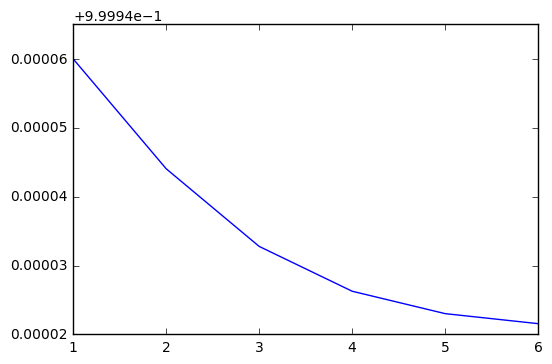

In [107]:
grad_descent(X_train[:1000],y_train[:1000],np.zeros(len(X_train.columns)),0.001, 20000,1e-05,False)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

(6, array([ -5.64211382e-05,  -2.44692944e-05,   2.94247360e-05,
         -1.01473153e-05,  -3.08863189e-06,  -8.60392600e-06,
          2.53296672e-06,  -7.07606894e-06,   7.83983380e-06,
         -3.95250096e-05,   1.05990988e-04,   4.06617418e-05,
          6.66479532e-05,   9.07525918e-06,   1.31296935e-04,
          1.20635014e-04,  -6.80604312e-05,   7.86576943e-05,
         -5.00588981e-06,  -3.20142942e-05,  -5.31841692e-05,
          0.00000000e+00,  -5.32032183e-06,  -1.13124391e-05,
         -1.49252222e-05,  -5.15168825e-05,  -1.94407527e-05,
         -6.41555317e-06,  -2.41975148e-05,  -1.43431048e-06,
         -2.19298255e-05,  -4.51689156e-05,  -1.85207264e-05,
         -4.40254637e-05,  -3.12685199e-05,  -6.10167641e-05,
          7.28905752e-07,  -2.43270555e-05,  -1.09689776e-05,
          3.88172297e-08,  -1.60448629e-06,  -7.90692042e-06,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         -5.11340569e-06,   0.00000000e+00,   0.00000000e+00,
     

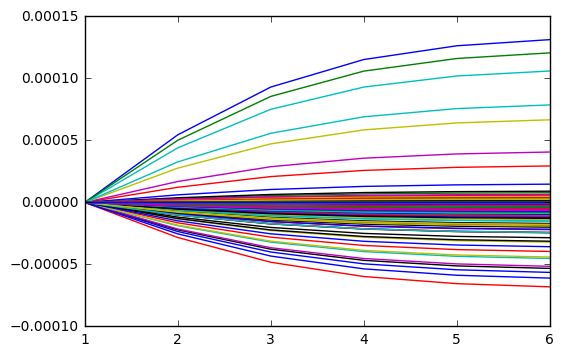

In [108]:
# Регуляризованный
grad_descent(X_train[:1000],y_train[:1000],np.zeros(len(X_train.columns)),0.001, 20000,1e-05,True)

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

Шаг: 0.001 Вес: 0
1.0
0.999984051622
0.999972778971
0.999966272496
0.999963019765
0.999961565211
Шаг: 0.001 Вес: 1
2.17245985302
2.17047432457
2.16907342076
2.16826581798
2.16786235767
2.16768199978
2.16760838252
2.16758055988
Шаг: 1 Вес: 0
1.0
0.985788697804
0.978422108976
0.974623924917
0.972823155779
0.972037249769
0.971719750786
0.971600249257
0.971558065149
0.971544011496
0.971539568149
0.971538228506
Шаг: 1 Вес: 1
2.17245985302
1.36094776098
1.19113497122
1.16170004914
1.14958072586
1.14459281111
1.14262548021
1.14189192052
1.1416338709
1.14154800584
1.14152086876
1.14151268813
1.14151032672
Шаг: 10 Вес: 0
1.0
1.01438032252
2.18897259176
5.57436951822
3.06689480482
1.11093142157
0.972086486248
0.95192746484
0.94644527338
0.944765936408
0.944249149813
0.944094650608
0.944050163819
0.94403783442
0.944034539916
Шаг: 10 Вес: 1
2.17245985302
99.8245781024
7351.87718666
165191.160329
587796.179324
50082.0145066
11189.5254131
7174.38973442
6199.18920234
5911.4824917
5824.02048026
5797.9

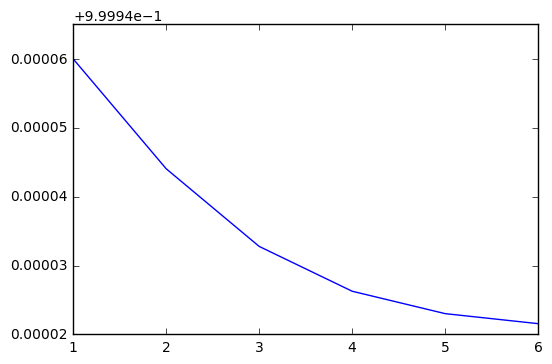

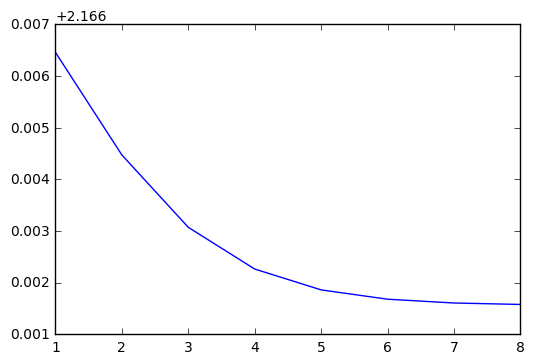

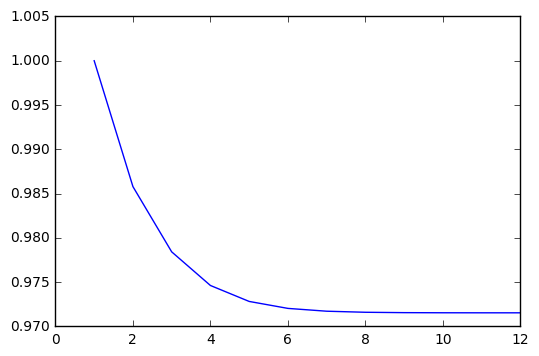

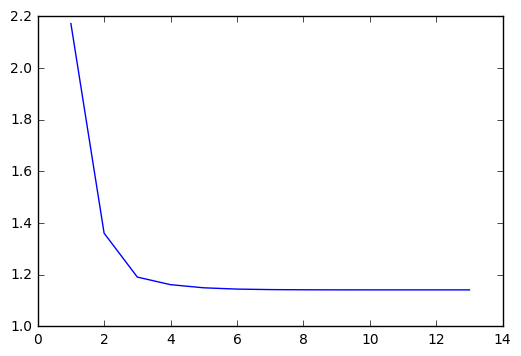

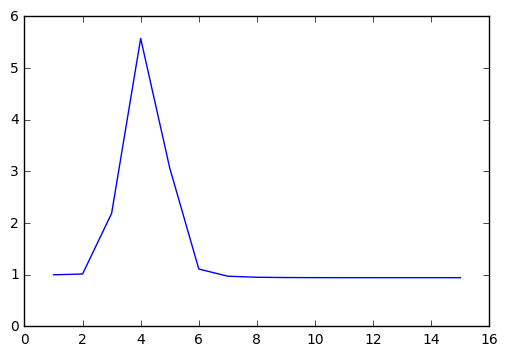

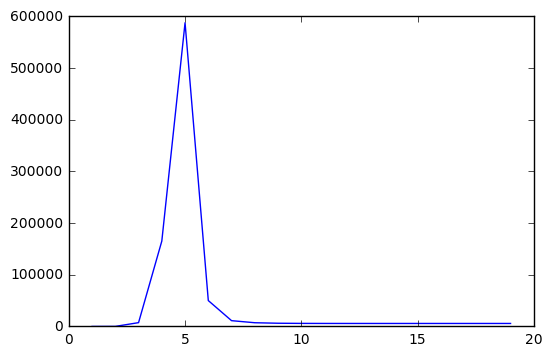

In [109]:
# Видим, что лучшие результаты дает нулевая реализация
step_size_list = [0.001,1,10]
w0_values=[np.zeros(len(X_train.columns)), np.random.random(len(X_train.columns))]
for i in step_size_list:
    for j in range(len(w0_values)):
        print("Шаг:",i,"Вес:",j)
        grad_descent(X_train[:1000],y_train[:1000],w0_values[j],i, 20000,1e-05,False)

Шаг: 0.001 Вес: 0
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. 

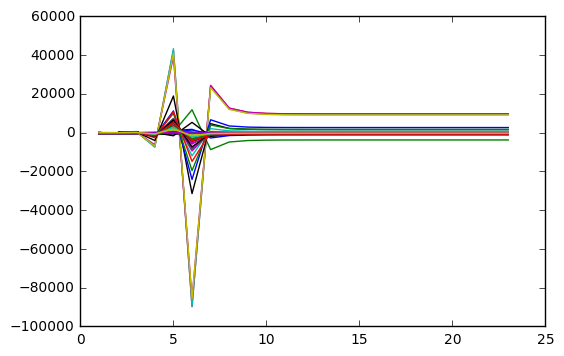

In [110]:
step_size_list = [0.001,1,10]
w0_values=[np.zeros(len(X_train.columns)), np.random.random(len(X_train.columns))]
for i in step_size_list:
    for j in range(len(w0_values)):
        print("Шаг:",i,"Вес:",j)
        grad_descent(X_train[:1000],y_train[:1000],w0_values[j],i, 20000,1e-05,True)

**17. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

[ 0.75730706  0.3674842   0.60217588  0.10447684  0.00708795  0.75209764
  0.17738134  0.3085007   0.49356686  0.87867286  0.29850106  0.33674593
  0.19758878  0.28114389  0.49921563  0.85705008  0.33936938  0.70553261
  0.06300326  0.09349386  0.2636399   0.20012123  0.04798458  0.21453569
  0.23929834  0.99125229  0.72665418  0.69405128  0.17695334  0.02703594
  0.15302551  0.77050559  0.57416559  0.46064516  0.05081569  0.5184202
  0.0634323   0.87577543  0.92620273  0.88508957  0.22693387  0.90273251
  0.71027786  0.19767349  0.57923897  0.31113245  0.73886373  0.05135825
  0.91659926  0.98431731  0.2751485   0.78415088  0.18583943  0.7248089
  0.06319784  0.69441278  0.06140565  0.76618185  0.88382576  0.71397722
  0.53192215  0.19290133  0.89423837  0.40881906  0.91301513  0.16718614
  0.98664474  0.4929915   0.7845687   0.65058662  0.53757703  0.38000873
  0.50964621  0.82909299  0.89335212  0.88955488  0.41768817  0.81492687
  0.4175754   0.58521723  0.93038986  0.25113283  0.3

(14, array([ 0.00375364,  0.00916459,  0.01298613,  0.02021965, -0.08058631,
        -0.05579893, -0.07372949, -0.06897957, -0.00389268,  0.00879958,
         0.0322951 ,  0.01995044,  0.01745287,  0.0115107 ,  0.04351815,
         0.01086248,  0.0042721 , -0.00255008, -0.00266894, -0.0027719 ,
        -0.00454888,  0.00635818, -0.00125837,  0.00196046,  0.00200767,
         0.02138761,  0.02038639,  0.02172289,  0.00084404, -0.00010769,
        -0.00025385,  0.0167703 ,  0.01715769,  0.00863107, -0.00905301,
         0.00681398,  0.00480283,  0.023845  ,  0.02768957,  0.02872043,
         0.0073527 ,  0.02937918,  0.02316822,  0.00644048,  0.01882414,
         0.01006424,  0.02407018,  0.00167811,  0.02985379,  0.03200482,
         0.00893097,  0.02554278,  0.00594921,  0.0236259 ,  0.00164389,
         0.02258728, -0.00423009,  0.02482926,  0.02827628,  0.02315135,
         0.01729906,  0.00627453,  0.02863456,  0.01332304,  0.02977226,
         0.00542448,  0.03207184,  0.0159542 , 

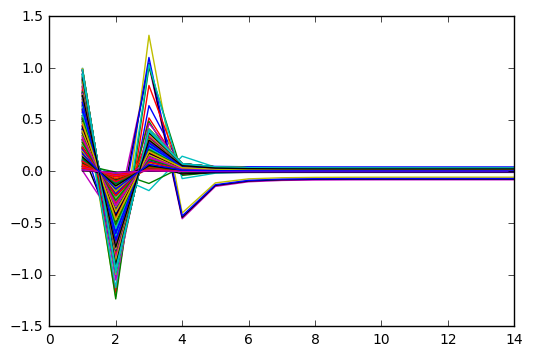

In [111]:
grad_descent(X_train,y_train,np.random.random(len(X_train.columns)),1, 20000,1e-05,True)

2.55367356987
1.47660975511
1.25448111986
1.2253760537
1.21269560808
1.2073642769
1.20524401519
1.20445092599
1.20417161121
1.20407863266
1.20404924348
1.20404038357
1.20403782604


(13, 1.204037826040294)

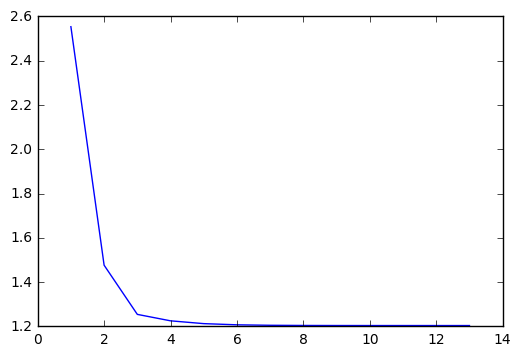

In [114]:
# Модель с реализацией быстрее достигает минимума
grad_descent(X_train,y_train,np.random.random(len(X_train.columns)),1, 20000,1e-05,False)

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**18*. (1 бонусный балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [159]:
def sgd(X, y,w0, step_size, max_iter, eps, is_reg):
    if is_reg != True:
        iteration = []
        weights = []
        functionals = []
        plt.figure()
        for i in range(1,max_iter):
            iteration.append(i)
            step_size=step_size/np.sqrt(i)
            func = get_func(w0,X,y)
            functionals.append(func)
            weights.append(w0)
            prediction = make_pred(X,w0)
            index =np.random.randint(X.shape[0])
            sgrad = 2*np.dot((-X.loc[X.index[index]].T/y[X.index[index]]),\
            ((y[X.index[index]] - y_pred[index])/y[X.index[index]]))/len(y)
            w = w0 - step_size*stoch
            print(functionals[-1])
            if norm(w-w0)<eps:
                break
            w0=w
        plt.plot(iteration,functionals)
    else: 
        iteration = []
        weights = []
        functionals = []
        plt.figure()
        for i in range(1,max_iter):
            iteration.append(i)
            step_size=step_size/np.sqrt(i)
            func = get_func(w0,X,y)
            functionals.append(func)
            weights.append(w0)
            prediction = make_pred(X,w0)
            index = np.random.randint(X.shape[0])
            sgrad = 2*np.dot((-X.loc[X.index[index]].T/y[X.index[index]]),\
            ((y[X.index[index]] - y_pred[index])/y[X.index[index]]))/len(y) + 2*w0
            w = w0 - step_size*stoch
            print(functionals[-1])
            if norm(w-w0)<eps:
                break
            w0=w
        plt.plot(iteration,functionals)
    return iteration[-1], functionals[-1]

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [160]:
weights,functional,iteration=sgd(X_train[:1000],y_train[:1000],np.random.random(len(X_train.columns)),0.005, 20000,1e-10,False)

KeyError: 47587

In [149]:
weights,functional,iteration=sgd(X_train,y_train,np.random.random(len(X_train.columns)),0.05, 20000,1e-10,False)

KeyError: 26165

In [161]:
prediction=make_pred(X_test,weights)
functionals=get_func(weights,X_test,Y_test)
print('Тестовая выборка, R^2', metrics.r2_score(y_test,prediction))
print('Тестовая выборка, MSE', metrics.mean_squared_error(y_test,prediction))
print('Тестовая выборка, MSPE', functionals)

NameError: name 'weights' is not defined

In [ ]:
# Посмотрим на значения для регуляризованного функционала
weights_regularized,functionals_r,iteration_r=sgd(X_train,Y_train,np.random.random(len(X_train.columns)),1, 20000,1e-10,True)

In [ ]:
# Посмотрим на значения и сравним
prediction_reg=make_pred(X_test,weights_regularized)
functionals_r=get_func(weights_regularized,X_test,y_test)
print('R2_Test', metrics.r2_score(y_test,prediction_reg))
print('MSE_Test', metrics.mean_squared_error(y_test,prediction_reg))
print('MSPE_Test', functionals_r)

**19*. (0.5 бонусного балла)** Аналогично п.17 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
weights,functional,iteration=sgd(X_train,y_train,np.random.random(len(X_train.columns)),0.05, 20000,1e-10,False)
weights_regularized,functionals_r,iteration_r=sgd(X_train,y_train,np.random.random(len(X_train.columns)),1, 20000,1e-10,True)

**20. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.17? Почему?

In [162]:
X_test=X_test.drop(['One_feature'],axis=1)
X_train=X_train.drop(['One_feature'],axis=1)

ValueError: labels ['One_feature'] not contained in axis

In [163]:
lm = lr.fit(X_train, y_train)
get_func(lm.coef_,X_test,y_test)

ValueError: shapes (19022,337) and (1,337) not aligned: 337 (dim 1) != 1 (dim 0)